# wind scenarios

1. Normal wind speed model + Normal turbulence model;
2. Normal wind speed model + extreme turbulence model;
3. extreme wind speed model + normal turbulence model;

In [2]:
import numpy as np
from wind_load import Wind_load
from params import Params
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
params = Params()

## Normal wind conditions

In [ ]:
wl_nn = Wind_load(time=200, hyperparameters=params, V_hub=8.6, fs=5) 

In [ ]:
# mean and sigma for a i.i.d Gaussian distribution

mean, sigma = wl_nn.get_wind_speed_z(wind_model='normal', turbulence_model='normal')

In [ ]:
# mean

In [ ]:
# for each height, there is a i.i.d Gaussian process 

In [ ]:
ts_winds_z = wl_nn.get_wind_speed_series(mean, sigma)

In [ ]:
ts_winds_z.shape

In [ ]:
wl_nn.plot_wind_speed_series(ts=ts_winds_z, node_index=-1)

In [ ]:
wind_loads = wl_nn.get_wind_loads(wind_speed_series=ts_winds_z)

In [ ]:
wind_loads.shape

In [ ]:
wl_nn.plot_wind_loads(wind_loads=wind_loads, node_index=-1)

In [ ]:
wl_nn.save_wind_load_series(wind_loads)

## 6.2 scenario - `Extreme wind speed` + `Normal turbulence wind` = EN

In [18]:
# In the event of NTM case, Merhad said V_hub = 0.7 * V_ref

wl_EN = Wind_load(time=600, hyperparameters=params, V_hub=params.V_ref, fs=2) 

In [19]:
# to test the average wind speed
# 15 elements

ave_ws_elements, sigma = wl_EN.get_wind_speed_z_interpolation(wind_model='extreme', turbulence_model='normal')

In [20]:
ave_ws_elements.shape

(15,)

In [21]:
# the element_average speed at each height
ave_ws_elements

array([55.22029016, 59.59529637, 62.31348237, 64.3169266 , 65.91517126,
       66.39239567, 66.84338229, 67.27101717, 67.67772755, 68.06557487,
       68.43632537, 68.79150428, 69.13243812, 69.46028803, 69.77607638])

In [22]:
# params.cross_sec_area.shape

In [23]:
# # the wind speed time series at height z

winds_series_avespeed = wl_EN.get_wind_speed_series(ave_ws_elements, sigma)

In [24]:
winds_series_avespeed.shape

(15, 1200)

In [25]:
# compute the load for the rotor at the hub
F_hub = wl_EN.cp_wind_loads_F_hub(sigma=sigma)

In [26]:
# F_hub

**directly save the 1d time series**

In [27]:
# wl_EN.save_wind_load_series(ts=F_hub, name='load_nodal_hub', style='ignore')

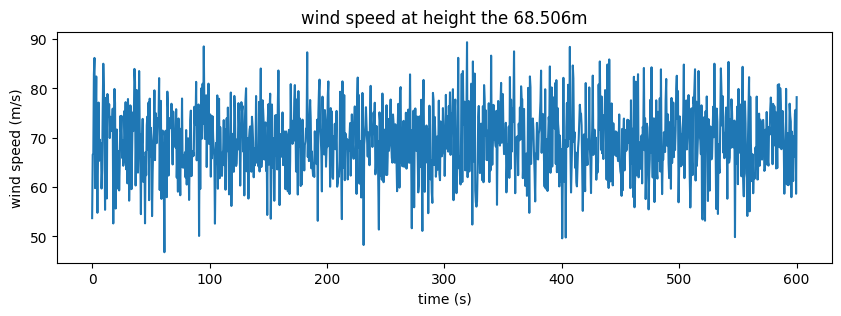

In [28]:
# plot the wind speed series at the highest node

wl_EN.plot_wind_speed_series(winds_series_avespeed, node_index=-2)

In [ ]:
# previous ways of computing drag force `f`

ft = wl_EN.cp_dragforce_f(wind_speed_series=winds_series_avespeed)

In [ ]:
ft.shape

In [ ]:
ft[0]

In [ ]:
# save it to Francesca
wl_EN.save_wind_load_series(ts=ft, name='load_elements', style='Francesca')

In [ ]:
params.cross_sec_area